In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import re
import json
import ast

In [5]:
df1 = pd.read_excel("bangalore_cars.xlsx")
df1

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [12]:
df2 = pd.read_excel("chennai_cars.xlsx")
#df2

In [14]:
df3 = pd.read_excel("delhi_cars.xlsx")
#df3

In [16]:
df4 = pd.read_excel("hyderabad_cars.xlsx")
#df4

In [18]:
df5 = pd.read_excel("jaipur_cars.xlsx")
#df5

In [20]:
df6 = pd.read_excel("kolkata_cars.xlsx")
#df6

In [ ]:
ii) Convert it into a structured format.

In [21]:
def structure_data(df):
    d1_list = []
    d2_list = []
    d3_list = []
    d4_list = []
    d5_list = []
    for row in range(len(df)):
        a = df.iloc[row]["new_car_detail"]
        res = ast.literal_eval(a)
        d1_df = pd.DataFrame([res])
        d1_list.append(d1_df)

        b = df.iloc[row]["new_car_overview"]
        res = ast.literal_eval(b)
        d2_df = pd.DataFrame([res])
        key_lst=[]
        val_lst=[]
        for i in d2_df["top"]:
            for j in i:
                key_lst.append(j["key"])
                val_lst.append(j["value"])
        result = dict(zip(key_lst, val_lst))
        d2_df = pd.DataFrame([result])
        d2_list.append(d2_df)

        c = df.iloc[row]["new_car_feature"]
        res = ast.literal_eval(c)
        d3_df = pd.DataFrame()
        for i in res.keys():
            if i == 'heading':
                d3_df[res[i]] = [len(res["top"])]
            elif i == 'data':
                for a in res[i]:
                    for b in a:
                        if b == 'heading':
                            d3_df[a[b]] = [len(a["list"])]
        d3_list.append(d3_df)
        
        d = df.iloc[row]["new_car_specs"]
        res = ast.literal_eval(d)
        d4_df = pd.DataFrame()
        for i in res.keys():
            if i == 'top':
                for j in res[i]:
                    d4_df[j["key"]] = [j["value"]]
            elif i == 'data':
                for a in res[i]:
                    for b in a:
                        if b == 'heading':
                            d4_df[a[b]] = [len(a["list"])]
                        elif b == 'list':
                            for j in a[b]:
                                d4_df[j["key"]] = [j["value"]]
        d4_df = d4_df.rename(columns={'Seats':'Seats_capacity'})
        d4_list.append(d4_df)
        
        e = df.iloc[row]["car_links"]
        d5_df = pd.DataFrame([e])
        d5_list.append(d5_df) 
        
    d1 = pd.concat(d1_list, ignore_index=True)
    d2 = pd.concat(d2_list, ignore_index=True)
    d3 = pd.concat(d3_list, ignore_index=True)
    d4 = pd.concat(d4_list, ignore_index=True)
    d5 = pd.concat(d5_list, ignore_index=True)
    
    df = d1.join(d2).join(d3).join(d4).join(d5)
    df.rename(columns={0:"car_links"},inplace = True)
    
    return df


In [22]:
df1 = structure_data(df1)
df1

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Drum,NaN,NaN,"Tubeless,Radial",4,352-litres,16,16,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,0,Diesel,SUV,"1,56,039",Manual,2,2nd Owner,Toyota,Toyota Fortuner,2012,...,Drum,176 Kmph,9.6 Seconds,"Tubeless,Radial",5,296-litres,17,17,NaN,https://www.cardekho.com/used-car-details/used...
1477,0,Petrol,Sedan,"56,000",Manual,2,2nd Owner,Maruti,Maruti SX4,2008,...,Drum,177 kmph,12.1 seconds,"Tubeless, Radial",4,505 litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...
1478,0,Petrol,Hatchback,"42,000",Manual,2,2nd Owner,Honda,Honda Brio,2014,...,Drum,164 Kmph,14.5 Seconds,"Tubeless,Radial",5,175-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1479,0,Diesel,Hatchback,"93,003",Manual,1,1st Owner,Hyundai,Hyundai i20,2018,...,Drum,180 Kmph,11.9 Seconds,Tubeless,5,295-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...


In [23]:
df2 = structure_data(df2)
df2

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen,car_links
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,No,1280mm,1290mm,1540kg,4.5 metres,145 Kmph,15.7 Seconds,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,No,NaN,NaN,NaN,5.0,NaN,11.7,72.2 x 81.3,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,No,1400mm,1385mm,NaN,4.7 metres,165 Kmph,14.3 Seconds,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,No,NaN,NaN,NaN,5.1 meters,172 Kmph,13.7 Seconds,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,0,Petrol,Hatchback,"42,891",Automatic,1,1st Owner,Maruti,Maruti Swift,2018,...,No,1530mm,1530mm,1315kg,4.8 Meters,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1415,0,Diesel,SUV,"59,100",Manual,1,1st Owner,Renault,Renault Duster,2018,...,No,1560mm,1567mm,1777kg,5.2 metres,156 Kmph,13.9 Seconds,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1416,0,Petrol,SUV,"55,913",Automatic,1,1st Owner,Tata,Tata Nexon,2018,...,No,1540 mm,1530 mm,NaN,5.1m,154.19 kmph,NaN,77x85.8,209 mm,https://www.cardekho.com/used-car-details/used...
1417,0,Diesel,SUV,"65,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Tiguan,2017,...,No,1578mm,1568mm,2250kg,5.75meters,NaN,NaN,74.5 x 81 mm,NaN,https://www.cardekho.com/used-car-details/used...


In [24]:
df3 = structure_data(df3)
df3

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Turning Radius,Top Speed,Acceleration,Gross Weight,Front Tread,Rear Tread,BoreX Stroke,Compression Ratio,Ground Clearance Unladen,car_links
0,0,Diesel,SUV,"10,000",Automatic,1,1st Owner,Kia,Kia Seltos,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"57,437",Manual,2,2nd Owner,Hyundai,Hyundai Creta,2016,...,5.3 metres,165 Kmph,10.5 Seconds,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"8,000",Automatic,1,1st Owner,Mercedes-Benz,Mercedes-Benz GLC,2020,...,NaN,217 Kmph,NaN,2360kg,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"28,151",Manual,2,2nd Owner,Maruti,Maruti Swift,2018,...,4.8,NaN,NaN,1335,1530,1530,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,SUV,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,...,5.3 metres,165 Kmph,10.5 Seconds,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,Petrol,Sedan,"60,000",Automatic,1,1st Owner,Honda,Honda City,2019,...,5.3 metres,195 Kmph,10 Seconds,1455kg,1490mm,1480mm,73.0 X 89.4 mm,10.3:1,NaN,https://www.cardekho.com/used-car-details/used...
1481,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Kia,Kia Sonet,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1482,0,Petrol,Sedan,"60,000",Manual,1,1st Owner,Hyundai,Hyundai Verna,2011,...,5.2 metres,196km/hr,10.5 Seconds,NaN,NaN,NaN,77.0mm X 85.44mm,10.5;1,NaN,https://www.cardekho.com/used-car-details/used...
1483,0,Diesel,SUV,"38,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2019,...,5.3 metres,160.58kmph,10.83 s,NaN,NaN,NaN,NaN,NaN,190mm,https://www.cardekho.com/used-car-details/used...


In [25]:
df4 = structure_data(df4)
df4

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Top Speed,Acceleration,Ground Clearance Unladen,car_links
0,0,Petrol,Hatchback,"20,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Polo,2022,...,Disc,Drum,"Tubeless,Radial",R16,5,280,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"85,582",Manual,2,2nd Owner,Hyundai,Hyundai EON,2014,...,Disc,Drum,Tubeless,NaN,5,215-litres,135 Kmph,19 Seconds,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"10,000",Manual,1,1st Owner,Hyundai,Hyundai Venue,2023,...,Disc,Drum,"Tubeless, Radial",NaN,5,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"50,750",Manual,1,1st Owner,Maruti,Maruti Baleno,2017,...,Disc,Drum,"Tubeless,Radial",16,5,339-litres,180 Kmph,12.36 seconds,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,SUV,"10,000",Automatic,1,1st Owner,Mahindra,Mahindra Thar,2022,...,Disc,Drum,"Radial, Tubeless",18,3,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Mahindra,Mahindra XUV500,2013,...,Disc & Caliper Type,Disc & Caliper Type,"Tubeless,Radial",17,5,NaN,175 kmph,12.5 Seconds,NaN,https://www.cardekho.com/used-car-details/used...
1479,0,Diesel,Sedan,"50,000",Automatic,1,1st Owner,Jaguar,Jaguar XF,2014,...,Disc,Disc,"Tubeless,Radial",20,4,540-litres,250 Kmph,6.4 Seconds,NaN,https://www.cardekho.com/used-car-details/used...
1480,0,Diesel,Sedan,"1,20,000",Automatic,3,3rd Owner,BMW,BMW 5 Series,2018,...,Ventilated Disc,Ventilated Disc,"Tubeless, Runflat",R18,4,520-litres,235kmph,7.5,NaN,https://www.cardekho.com/used-car-details/used...
1481,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Tata,Tata Nexon,2019,...,Disc,Drum,Tubeless Radial Tyres,NaN,5,350,154.19 kmph,13.25 Seconds,209 mm,https://www.cardekho.com/used-car-details/used...


In [26]:
df5 = structure_data(df5)
df5

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Acceleration,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Gross Weight,BoreX Stroke,Compression Ratio,Ground Clearance Unladen,car_links
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,11.9 Seconds,Tubeless,16,5,295-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,NaN,"Radial, Tubeless",NaN,5,268,1335,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,15.05 Seconds,"Tubeless, Radial",NaN,5,235-litres,1250kg,73 X 82 mm,11.0:1,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,12.9 Seconds,Tubeless,NaN,5,256,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,18.6 Seconds,Tubeless Tyres,NaN,5,180-liters,1350kg,69 x 72 mm,NaN,NaN,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Chevrolet,Chevrolet Beat,2011,...,NaN,"Tubeless,Radial",14,5,170-litres,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1116,0,Petrol,Hatchback,"70,000",Manual,1,1st Owner,Maruti,Maruti Alto,2007,...,17.7 seconds,"Tubeless,Radial",12,5,NaN,1140kg,68.5 x 72.0 mm,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1117,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Renault,Renault Kiger,2022,...,NaN,"Tubeless, Radial",16,5,405,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1118,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Alto,2009,...,17.7 seconds,"Tubeless,Radial",12,5,NaN,1140kg,68.5 x 72.0 mm,NaN,NaN,https://www.cardekho.com/used-car-details/used...


In [27]:
df6 = structure_data(df6)
df6

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Ground Clearance Unladen,Cargo Volumn,Compression Ratio,Acceleration,Top Speed,car_links
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,...,Solid Disc,"Tubeless,Radial",17,4,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,...,Drum,NaN,NaN,5,185mm,222,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,...,Drum,"Tubeless, Radial",NaN,5,NaN,405,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,...,Drum,"Tubeless,Radial",14,5,NaN,295 Lit,:1,12.96 Sec,NaN,https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,...,Drum,"Tubeless,Radial",16,5,NaN,460-litres,NaN,8.2 Seconds,212 Kmph,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,Drum,"Tubeless, Radial",NaN,5,NaN,313,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...
1377,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,Drum,Tubeless Tyres,NaN,5,NaN,177-litres,NaN,19 Seconds,140 kmph,https://www.cardekho.com/used-car-details/used...
1378,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,Solid Disc,"Tubeless,Radial",17,4,NaN,475-litres,9.3:1,8.8 Seconds,230km/hr,https://www.cardekho.com/used-car-details/used...
1379,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,Drum,"Tubeless,Radial",14,5,NaN,236-liters,NaN,15 Seconds,156 Kmph,https://www.cardekho.com/used-car-details/used...


In [28]:
df1["City"] = 'Bangalore'

In [29]:
df2["City"] = 'Chennai'

In [30]:
df3["City"] = 'Delhi'

In [31]:
df4["City"] = 'Hyderabad'

In [32]:
df5["City"] = 'Jaipur'

In [33]:
df6["City"] = 'Kolkata'

In [34]:
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

In [35]:
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,"Tubeless,Radial",4,352-litres,16,16,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,NaN,NaN,"Tubeless, Radial",5,313,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres,17,17,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,156 Kmph,15 Seconds,"Tubeless,Radial",5,236-liters,14,14,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata


In [36]:
df.to_excel('Structured_df.xlsx')

In [39]:
pd.DataFrame(df.isnull().sum())

,0
it,0
ft,0
bt,0
km,0
transmission,0
...,...
Wheel Size,2983
Alloy Wheel Size,2983
Ground Clearance Unladen,7854
car_links,0


In [40]:
# Iterate through columns and their data types
for col, dtype in df.dtypes.items():
    non_null_count = df[col].notnull().sum()  # Non-null count per column

    # If the column is categorical (object) and has missing values
    if non_null_count < len(df) and dtype == 'object' and col != 'priceActual':
        # Ensure mode() is not empty before filling
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value[0])

    # If the column is numeric and has missing values
    elif non_null_count < len(df):
        try:
            # Fill missing values with the median if it's numeric
            df[col] = df[col].fillna(df[col].median())
        except TypeError:
            print(f"Cannot calculate median for column: {col}, invalid data type.")

In [41]:
df["bt"] = df["bt"].replace("",df["bt"].mode()[0])
df["priceFixedText"] = df["priceFixedText"].fillna(0)
df["Wheel Size"] = df["Wheel Size"].fillna(0)
df["Alloy Wheel Size"] = df["Alloy Wheel Size"].fillna(0)

In [42]:
df["priceActual"] = df["priceActual"].replace("",0)
price_mean = df["priceActual"].str.replace('₹ |Lakh',"",regex=True).astype(float).mean().round(2)
df["priceActual"].replace(0,price_mean,inplace=True)

In [43]:
df["priceSaving"] = df["priceSaving"].replace("",0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   it                             8369 non-null   int64  
 1   ft                             8369 non-null   object 
 2   bt                             8369 non-null   object 
 3   km                             8369 non-null   object 
 4   transmission                   8369 non-null   object 
 5   ownerNo                        8369 non-null   int64  
 6   owner                          8369 non-null   object 
 7   oem                            8369 non-null   object 
 8   model                          8369 non-null   object 
 9   modelYear                      8369 non-null   int64  
 10  centralVariantId               8369 non-null   int64  
 11  variantName                    8369 non-null   object 
 12  price                          8369 non-null   o

In [45]:
df.to_excel("Not_null.xlsx")

In [46]:
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,165 Kmph,10 Seconds,"Tubeless,Radial",4,352-litres,16,16,190mm,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,190mm,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,190mm,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,165 Kmph,10 Seconds,"Tubeless, Radial",5,313,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,140 kmph,19 Seconds,Tubeless Tyres,5,177-litres,16,16,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,230km/hr,8.8 Seconds,"Tubeless,Radial",4,475-litres,17,17,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,156 Kmph,15 Seconds,"Tubeless,Radial",5,236-liters,14,14,190mm,https://www.cardekho.com/used-car-details/used...,Kolkata


In [ ]:
Cleaning Features (except target)

In [ ]:
i) Conveting the columns datatype to numeric

In [47]:
lst = ["ownerNo","modelYear","Year of Manufacture","Features","Comfort & Convenience","Interior","Exterior","Safety",
       "Entertainment & Communication","Engine and Transmission","Displacement","No of Cylinder",
       "Values per Cylinder","Dimensions & Capacity","Miscellaneous","Seating Capacity","No Door Numbers"]
for i in lst:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [48]:
df["Torque"] = df["Torque"].astype(str)
df["Torque"] = df["Torque"].str.replace(r'Nm|nm|NM|kgm| KGM| Nm| kgs|at.*|/.*|\(.*\)', '', regex=True).str.strip()
df["Torque"] = df["Torque"].astype(float)

In [49]:
df["Turning Radius"] = df["Turning Radius"].str.replace(r"metres|Seconds|mtrs.|meters|eters|eter|etre|trs|mm|M|Metre|m|\.|,", "", regex=True).str.strip()
df["Turning Radius"] = df["Turning Radius"].astype(int)

In [50]:
df["Kerb Weight"] = df["Kerb Weight"].str.replace(r"Kerb Weight","0", regex=True)
df["Kerb Weight"] = df["Kerb Weight"].str.replace(r"kg|Kg|kgs|Kgs|s|-*|,|\s*|\.","",regex=True).astype(int)

In [51]:
df["bhp"] = df["Max Power"].str.split('@', expand=True).drop(columns=[2], axis=1)[0]
df["rpm"] = df["Max Power"].str.split('@', expand=True).drop(columns=[2], axis=1)[1]

df["bhp"] = df["bhp"].str.replace(r"bhp|PS|at*|\s*|rpm|hp|\.|RPM*|,|kW|-*|HP*|B|Ps|ps|\(.*\)|/|\[.*\]","",regex=True).astype(float)
df["rpm"] = df["rpm"].fillna(0)

def clean_max_power(max_power):
    pattern = r'\d{3,5}'
    match = re.search(pattern, max_power)
    if match and match.group(0):
        return match.group(0)
    else:
        return max_power
df['rpm'] = df['Max Power'].astype(str).apply(clean_max_power)
df["rpm"] = df["rpm"].replace(r'bhp', "",regex=True).astype(float)

In [52]:
df['km'] = df['km'].str.replace(",","")
df["Mileage"] = df["Mileage"].replace(r' km/kg|kmpl', "", regex=True).astype(float)
df["Seats"] = df["Seats"].str.replace('Seats','').str.strip()
df["Kms Driven"] = df["Kms Driven"].str.replace(",","").str.replace('Kms','').str.strip()
df["Engine"] = df["Engine"].str.replace('CC','').str.strip()
df["Length"] = df["Length"].str.replace(r"mm|,","", regex=True).astype(int)
df["Width"] = df["Width"].str.replace("mm|,","", regex=True).astype(int)
df["Height"] = df["Height"].str.replace("mm|,|-*","", regex=True).astype(int)
df["Wheel Base"] = df["Wheel Base"].str.replace("mm|,|m","",regex=True).astype(int)
df["Front Tread"] = df["Front Tread"].str.replace("mm|,","", regex=True).astype(int)
df["Rear Tread"] = df["Rear Tread"].str.replace("mm|,|`","", regex=True).astype(int)
df["Gross Weight"] = df["Gross Weight"].str.replace(r"kg|Kg|s|,|-*|\.|mm","", regex=True).astype(int)
df["Wheel Size"] = df["Wheel Size"].replace(r"R","", regex=True).astype(float)
df["Alloy Wheel Size"] = df["Alloy Wheel Size"].replace(r"R","", regex=True).astype(float)
df["Top Speed"] = df["Top Speed"].str.replace(r"kmph|km/h|/Hour|Km|km/hr|Kmph|ph|r","", regex=True).str.strip().replace("","0.0").astype(float)

In [53]:
lst=[]
for i in df["Registration Year"]:
    lst.append(re.findall(r'\d+', i))

In [54]:
df['Reg_year'] = lst
df['Reg_year'] = df['Reg_year'].apply(lambda x: x[0] if isinstance(x, list) else x)
current_year = 2024
yr_list=[]
for i in df['Reg_year']:
    yr_list.append(current_year-int(i))
df["Reg_age"] = yr_list

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   it                             8369 non-null   int64  
 1   ft                             8369 non-null   object 
 2   bt                             8369 non-null   object 
 3   km                             8369 non-null   object 
 4   transmission                   8369 non-null   object 
 5   ownerNo                        8369 non-null   int64  
 6   owner                          8369 non-null   object 
 7   oem                            8369 non-null   object 
 8   model                          8369 non-null   object 
 9   modelYear                      8369 non-null   int64  
 10  centralVariantId               8369 non-null   int64  
 11  variantName                    8369 non-null   object 
 12  price                          8369 non-null   o

In [56]:
def convert_to_lakhs(price):
    price = price.replace('₹', '').replace(',', '').strip()
    if 'Crore' in price:
        return float(price.replace('Crore', '').strip()) * 100
    elif 'Lakh' in price:
        return float(price.replace('Lakh', '').strip())     
    else:
        return float(price)/100

In [57]:
df.loc[:,'price_in_lakhs'] = df['price'].apply(convert_to_lakhs)

In [58]:
df.drop(columns=['Max Power',"price"], inplace=True)

In [59]:
df.to_csv("Clean_data.csv")

In [61]:
df.drop(columns=["priceFixedText", "Ground Clearance Unladen", "priceSaving", "owner", "trendingText", "variantName",
                 "Engine Displacement", "car_links", "Cargo Volumn", "Value Configuration", "Fuel Suppy System", 
                 "BoreX Stroke", "Compression Ratio", "Acceleration", "Seats_capacity", "Engine Type", "Max Torque", 
                 "Compression Ratio", "Tyre Type", "it", "Registration Year", "ft", "RTO", "priceActual", 
                 "transmission","Kms Driven", "Ownership",'priceSaving','priceFixedText',
                 'Gear Box', "Engine Type", "modelYear", "Year of Manufacture", "centralVariantId",
                "Reg_year", 'Kerb Weight','Front Tread','Rear Tread','Gross Weight',"Seats"], inplace=True)

In [62]:
Features_columns = ["Features","Comfort & Convenience", "Interior", "Exterior", "Safety", "Entertainment & Communication",
                   "Wheel Base", "Miscellaneous", "Steering Type", "Drive Type", "Color","Turbo Charger", "Super Charger",
                   "Front Brake Type", "Rear Brake Type"]

In [63]:
df.drop(columns = Features_columns, inplace=True)

In [64]:
columns_to_drop = ['Seats_x','ft','owner','Kms Driven','Ownership','it','priceActual','price','Value Configuration',
                   'priceSaving','priceFixedText','trendingText', 'Registration Year','RTO',
                    'variantName','Engine','Max Power','Torque','Engine Type','Engine Displacement',
                      'Kerb Weight','Gear Box','Transmission','Cargo Volumn','Compression Ratio',
                      'Max Torque','Tyre Type','Registration Month',
                      'Front Tread','Rear Tread','Gross Weight','Acceleration','BoreX Stroke','Ground Clearance Unladen']

In [65]:
df.to_csv("Necessary.csv")

In [ ]:
i) Label Encoder - ordinal categorical variables

In [67]:
df = pd.read_csv("Necessary.csv")

In [68]:
df = df.drop(columns=["Unnamed: 0"])
df

,bt,km,ownerNo,oem,model,Insurance Validity,Fuel Type,Transmission,Mileage,Engine,...,Turning Radius,Top Speed,No Door Numbers,Wheel Size,Alloy Wheel Size,City,bhp,rpm,Reg_age,price_in_lakhs
0,Hatchback,120000,3,Maruti,Maruti Celerio,Third Party insurance,Petrol,Manual,23.10,998,...,47,150.0,5,16.0,16.0,Bangalore,6704.0,6000.0,9,4.00
1,SUV,32706,2,Ford,Ford Ecosport,Comprehensive,Petrol,Manual,17.00,1497,...,53,165.0,4,16.0,16.0,Bangalore,12131.0,121.0,6,8.11
2,Hatchback,11949,1,Tata,Tata Tiago,Comprehensive,Petrol,Manual,23.84,1199,...,49,150.0,5,14.0,14.0,Bangalore,84.0,6000.0,6,5.85
3,Sedan,17794,1,Hyundai,Hyundai Xcent,Comprehensive,Petrol,Manual,19.10,1197,...,47,172.0,4,14.0,14.0,Bangalore,8186.0,6000.0,10,4.62
4,SUV,60000,1,Maruti,Maruti SX4 S Cross,Third Party insurance,Diesel,Manual,23.65,1248,...,52,190.0,5,16.0,16.0,Bangalore,885.0,4000.0,9,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,10000,1,Maruti,Maruti Celerio,Third Party insurance,Petrol,Manual,25.24,998,...,53,165.0,5,16.0,16.0,Kolkata,6571.0,5500.0,2,5.10
8365,Hatchback,120000,1,Maruti,Maruti Alto 800,Third Party insurance,Petrol,Manual,22.74,796,...,46,140.0,5,16.0,16.0,Kolkata,473.0,6000.0,10,1.80
8366,Sedan,50000,3,Mercedes-Benz,Mercedes-Benz C-Class,Third Party insurance,Petrol,Automatic,11.74,1796,...,542,230.0,4,17.0,17.0,Kolkata,186.0,186.0,13,5.50
8367,Hatchback,40000,1,Maruti,Maruti Ritz,Third Party insurance,Petrol,Manual,18.50,1197,...,47,156.0,5,14.0,14.0,Kolkata,8580.0,6000.0,12,1.40


In [69]:
le_lst = ["bt", "Insurance Validity", "City", "Fuel Type", "Transmission","oem", "model"]

In [70]:
le_encoder = LabelEncoder()
def le_encode(lst, df):
    for i in lst:
        df[i] = le_encoder.fit_transform(df[i])

In [71]:
le_encode(le_lst, df)

In [76]:
oh_lst = ["Turbo Charger", "Super Charger", "Steering Type"]

In [91]:
print("Columns in DataFrame:", df.columns.tolist())
print("Columns to encode:", oh_lst)


Columns in DataFrame: ['bt', 'km', 'ownerNo', 'oem', 'model', 'Insurance Validity', 'Fuel Type', 'Transmission', 'Mileage', 'Engine', 'Torque', 'Engine and Transmission', 'Displacement', 'No of Cylinder', 'Values per Cylinder', 'Dimensions & Capacity', 'Length', 'Width', 'Height', 'Seating Capacity', 'Turning Radius', 'Top Speed', 'No Door Numbers', 'Wheel Size', 'Alloy Wheel Size', 'City', 'bhp', 'rpm', 'Reg_age', 'price_in_lakhs']
Columns to encode: ['Turbo Charger', 'Super Charger', 'Steering Type']


In [92]:
from sklearn.preprocessing import OneHotEncoder

def oh_encode(lst, df):
    oh_encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
    for col in lst:
        if col in df.columns:
            # Fill missing values with "Unknown"
            df[col] = df[col].fillna("Unknown")
            # Apply one-hot encoding
            encoded = oh_encoder.fit_transform(df[[col]])
            # Create a DataFrame for encoded columns
            encoded_df = pd.DataFrame(
                encoded,
                columns=oh_encoder.get_feature_names_out([col]),
                index=df.index,
            )
            # Concatenate the encoded columns back to the original DataFrame
            df = pd.concat([df, encoded_df], axis=1)
        else:
            print(f"Column '{col}' not found in the DataFrame. Skipping...")
    return df


In [93]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower()
oh_lst = [col.lower().strip() for col in oh_lst]

# Apply one-hot encoding
df = oh_encode(oh_lst, df)


Column 'turbo charger' not found in the DataFrame. Skipping...
Column 'super charger' not found in the DataFrame. Skipping...
Column 'steering type' not found in the DataFrame. Skipping...


In [94]:
df


,bt,km,ownerno,oem,model,insurance validity,fuel type,transmission,mileage,engine,...,turning radius,top speed,no door numbers,wheel size,alloy wheel size,city,bhp,rpm,reg_age,price_in_lakhs
0,2,120000,3,20,160,5,4,1,23.10,998,...,47,150.0,5,16.0,16.0,0,6704.0,6000.0,9,4.00
1,7,32706,2,6,50,2,4,1,17.00,1497,...,53,165.0,4,16.0,16.0,0,12131.0,121.0,6,8.11
2,2,11949,1,29,273,2,4,1,23.84,1199,...,49,150.0,5,14.0,14.0,0,84.0,6000.0,6,5.85
3,8,17794,1,9,87,2,4,1,19.10,1197,...,47,172.0,4,14.0,14.0,0,8186.0,6000.0,10,4.62
4,7,60000,1,20,178,5,1,1,23.65,1248,...,52,190.0,5,16.0,16.0,0,885.0,4000.0,9,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,10000,1,20,160,5,4,1,25.24,998,...,53,165.0,5,16.0,16.0,5,6571.0,5500.0,2,5.10
8365,2,120000,1,20,155,5,4,1,22.74,796,...,46,140.0,5,16.0,16.0,5,473.0,6000.0,10,1.80
8366,8,50000,3,21,197,5,4,0,11.74,1796,...,542,230.0,4,17.0,17.0,5,186.0,186.0,13,5.50
8367,2,40000,1,20,175,5,4,1,18.50,1197,...,47,156.0,5,14.0,14.0,5,8580.0,6000.0,12,1.40


In [95]:
df.to_csv("encode.csv")

In [120]:
df.columns

Index(['bt', 'km', 'ownerno', 'oem', 'model', 'insurance validity',
       'fuel type', 'transmission', 'mileage', 'engine', 'torque',
       'engine and transmission', 'displacement', 'no of cylinder',
       'values per cylinder', 'dimensions & capacity', 'length', 'width',
       'height', 'seating capacity', 'turning radius', 'top speed',
       'no door numbers', 'wheel size', 'alloy wheel size', 'city', 'bhp',
       'rpm', 'reg_age', 'price_in_lakhs'],
      dtype='object')

In [121]:
numerical_features = ["km", "mileage", "engine", "torque", "displacement", "length", "width", "height", "top speed", 
                      "bhp", "rpm","reg_age"]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

In [122]:
df

,bt,km,ownerno,oem,model,insurance validity,fuel type,transmission,mileage,engine,...,turning radius,top speed,no door numbers,wheel size,alloy wheel size,city,bhp,rpm,reg_age,price_in_lakhs
0,2,0.021818,3,20,160,5,4,1,0.120524,0.1996,...,47,0.483871,5,16.0,16.0,0,1.841881e-09,0.909091,0.380952,4.00
1,7,0.005947,2,6,50,2,4,1,0.074631,0.2994,...,53,0.532258,4,16.0,16.0,0,3.340740e-09,0.018333,0.238095,8.11
2,2,0.002173,1,29,273,2,4,1,0.126091,0.2398,...,49,0.483871,5,14.0,14.0,0,1.353309e-11,0.909091,0.238095,5.85
3,8,0.003235,1,9,87,2,4,1,0.090430,0.2394,...,47,0.554839,4,14.0,14.0,0,2.251188e-09,0.909091,0.428571,4.62
4,7,0.010909,1,20,178,5,1,1,0.124661,0.2496,...,52,0.612903,5,16.0,16.0,0,2.347577e-10,0.606061,0.380952,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,0.001818,1,20,160,5,4,1,0.136624,0.1996,...,53,0.532258,5,16.0,16.0,5,1.805148e-09,0.833333,0.047619,5.10
8365,2,0.021818,1,20,155,5,4,1,0.117815,0.1592,...,46,0.451613,5,16.0,16.0,5,1.209692e-10,0.909091,0.428571,1.80
8366,8,0.009091,3,21,197,5,4,0,0.035059,0.3592,...,542,0.741935,4,17.0,17.0,5,4.170401e-11,0.028182,0.571429,5.50
8367,2,0.007273,1,20,175,5,4,1,0.085916,0.2394,...,47,0.503226,5,14.0,14.0,5,2.360005e-09,0.909091,0.523810,1.40


In [106]:
df.corr()

,bt,km,ownerno,oem,model,insurance validity,fuel type,transmission,mileage,engine,...,turning radius,top speed,no door numbers,wheel size,alloy wheel size,city,bhp,rpm,reg_age,price_in_lakhs
bt,1.000000,0.031965,-0.034679,-0.090954,-0.074163,-0.003327,-0.301065,-0.255178,-0.319919,0.480295,...,0.048295,0.340031,-0.540548,0.335250,0.335250,-0.004859,0.011516,-0.657596,-0.096567,-0.018720
km,0.031965,1.000000,0.115419,0.015448,0.023288,0.042837,-0.165490,0.065439,-0.010948,0.091089,...,0.039514,0.016461,-0.052821,-0.086328,-0.086328,-0.020517,-0.005404,-0.033740,0.246724,0.024089
ownerno,-0.034679,0.115419,1.000000,-0.040402,-0.030762,0.124369,-0.044848,0.046777,-0.078813,0.053909,...,0.037016,-0.022562,-0.078624,-0.168969,-0.168969,-0.058144,-0.008662,0.007375,0.388990,0.108171
oem,-0.090954,0.015448,-0.040402,1.000000,0.988939,0.031729,-0.019222,0.057014,0.065536,-0.053255,...,0.070357,-0.143629,0.112748,-0.010860,-0.010860,0.004477,0.008714,0.042473,-0.094004,-0.002697
model,-0.074163,0.023288,-0.030762,0.988939,1.000000,0.028269,-0.040365,0.040397,0.030632,-0.011621,...,0.098222,-0.103592,0.092388,-0.004639,-0.004639,-0.004007,0.012695,0.013408,-0.075499,0.000617
insurance validity,-0.003327,0.042837,0.124369,0.031729,0.028269,1.000000,-0.035062,0.112545,0.017758,-0.061008,...,0.017183,-0.084472,-0.023554,-0.130903,-0.130903,0.045538,-0.018840,0.022282,0.100738,0.033227
fuel type,-0.301065,-0.165490,-0.044848,-0.019222,-0.040365,-0.035062,1.000000,0.077116,-0.099960,-0.470729,...,-0.115381,-0.183854,0.019820,-0.250406,-0.250406,-0.014920,-0.004394,0.378379,-0.065549,0.019113
transmission,-0.255178,0.065439,0.046777,0.057014,0.040397,0.112545,0.077116,1.000000,0.252985,-0.352283,...,-0.117376,-0.398381,0.102637,-0.396352,-0.396352,0.097957,-0.024953,0.368575,0.191561,-0.008556
mileage,-0.319919,-0.010948,-0.078813,0.065536,0.030632,0.017758,-0.099960,0.252985,1.000000,-0.536589,...,-0.111759,-0.273635,0.068382,-0.197261,-0.197261,0.030864,-0.001340,0.459514,-0.110014,-0.090099
engine,0.480295,0.091089,0.053909,-0.053255,-0.011621,-0.061008,-0.470729,-0.352283,-0.536589,1.000000,...,0.200480,0.486062,-0.181630,0.492509,0.492509,-0.050570,0.049771,-0.640467,0.049934,0.024434


In [115]:
col = ["km", "insurance validity", "mileage", "engine", "torque", "turning radius", "bt", "fuel type","price_in_lakhs"]

In [116]:
def out_det():
    print(ll)
    print(ul)
    print(iqr)

In [117]:
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr

In [119]:
out_det()

km                     -0.008182
insurance validity     -2.500000
mileage                10.425000
engine                745.500000
torque                -47.500000
turning radius         40.500000
bt                     -7.000000
fuel type              -3.500000
price_in_lakhs         -4.645000
dtype: float64
km                       0.028182
insurance validity       9.500000
mileage                 27.985000
engine                1949.500000
torque                 372.500000
turning radius          60.500000
bt                      17.000000
fuel type                8.500000
price_in_lakhs          18.515000
dtype: float64
km                      0.009091
insurance validity      3.000000
mileage                 4.390000
engine                301.000000
torque                105.000000
turning radius          5.000000
bt                      6.000000
fuel type               3.000000
price_in_lakhs          5.790000
dtype: float64


In [123]:
filtered_df = df[(df["price_in_lakhs"] >= -4.645000) & (df["price_in_lakhs"] <= 18.515000)]

In [124]:
filtered_df

,bt,km,ownerno,oem,model,insurance validity,fuel type,transmission,mileage,engine,...,turning radius,top speed,no door numbers,wheel size,alloy wheel size,city,bhp,rpm,reg_age,price_in_lakhs
0,2,0.021818,3,20,160,5,4,1,0.120524,0.1996,...,47,0.483871,5,16.0,16.0,0,1.841881e-09,0.909091,0.380952,4.00
1,7,0.005947,2,6,50,2,4,1,0.074631,0.2994,...,53,0.532258,4,16.0,16.0,0,3.340740e-09,0.018333,0.238095,8.11
2,2,0.002173,1,29,273,2,4,1,0.126091,0.2398,...,49,0.483871,5,14.0,14.0,0,1.353309e-11,0.909091,0.238095,5.85
3,8,0.003235,1,9,87,2,4,1,0.090430,0.2394,...,47,0.554839,4,14.0,14.0,0,2.251188e-09,0.909091,0.428571,4.62
4,7,0.010909,1,20,178,5,1,1,0.124661,0.2496,...,52,0.612903,5,16.0,16.0,0,2.347577e-10,0.606061,0.380952,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2,0.001818,1,20,160,5,4,1,0.136624,0.1996,...,53,0.532258,5,16.0,16.0,5,1.805148e-09,0.833333,0.047619,5.10
8365,2,0.021818,1,20,155,5,4,1,0.117815,0.1592,...,46,0.451613,5,16.0,16.0,5,1.209692e-10,0.909091,0.428571,1.80
8366,8,0.009091,3,21,197,5,4,0,0.035059,0.3592,...,542,0.741935,4,17.0,17.0,5,4.170401e-11,0.028182,0.571429,5.50
8367,2,0.007273,1,20,175,5,4,1,0.085916,0.2394,...,47,0.503226,5,14.0,14.0,5,2.360005e-09,0.909091,0.523810,1.40


In [126]:
df[col].corr()

,km,insurance validity,mileage,engine,torque,turning radius,bt,fuel type,price_in_lakhs
km,1.000000,0.042837,-0.010948,0.091089,0.044030,0.039514,0.031965,-0.165490,0.024089
insurance validity,0.042837,1.000000,0.017758,-0.061008,-0.084898,0.017183,-0.003327,-0.035062,0.033227
mileage,-0.010948,0.017758,1.000000,-0.536589,-0.342102,-0.111759,-0.319919,-0.099960,-0.090099
engine,0.091089,-0.061008,-0.536589,1.000000,0.782394,0.200480,0.480295,-0.470729,0.024434
torque,0.044030,-0.084898,-0.342102,0.782394,1.000000,0.204053,0.479106,-0.601987,0.019505
turning radius,0.039514,0.017183,-0.111759,0.200480,0.204053,1.000000,0.048295,-0.115381,0.014652
bt,0.031965,-0.003327,-0.319919,0.480295,0.479106,0.048295,1.000000,-0.301065,-0.018720
fuel type,-0.165490,-0.035062,-0.099960,-0.470729,-0.601987,-0.115381,-0.301065,1.000000,0.019113
price_in_lakhs,0.024089,0.033227,-0.090099,0.024434,0.019505,0.014652,-0.018720,0.019113,1.000000


In [127]:
df[col].describe()

,km,insurance validity,mileage,engine,torque,turning radius,bt,fuel type,price_in_lakhs
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.010723,3.776198,0.091511,0.284925,0.204164,88.449038,4.981479,2.986378,18.359159
std,0.013466,1.455680,0.029803,0.095508,0.129675,149.183886,2.706353,1.431784,79.364616
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000
25%,0.005455,2.000000,0.074707,0.239400,0.124468,48.000000,2.000000,1.000000,4.040000
50%,0.009762,5.000000,0.088926,0.249600,0.159962,53.000000,7.000000,4.000000,6.200000
75%,0.014545,5.000000,0.107734,0.299600,0.248699,53.000000,8.000000,4.000000,9.830000
max,1.000000,6.000000,1.000000,1.000000,1.000000,6250.000000,9.000000,4.000000,997.030000


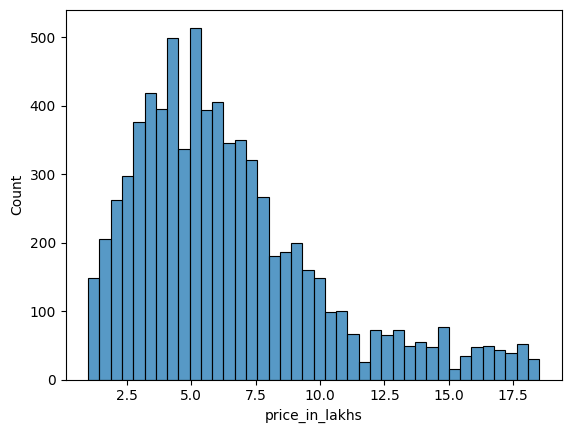

In [128]:
# Target variable
sns.histplot(filtered_df["price_in_lakhs"])
plt.show()

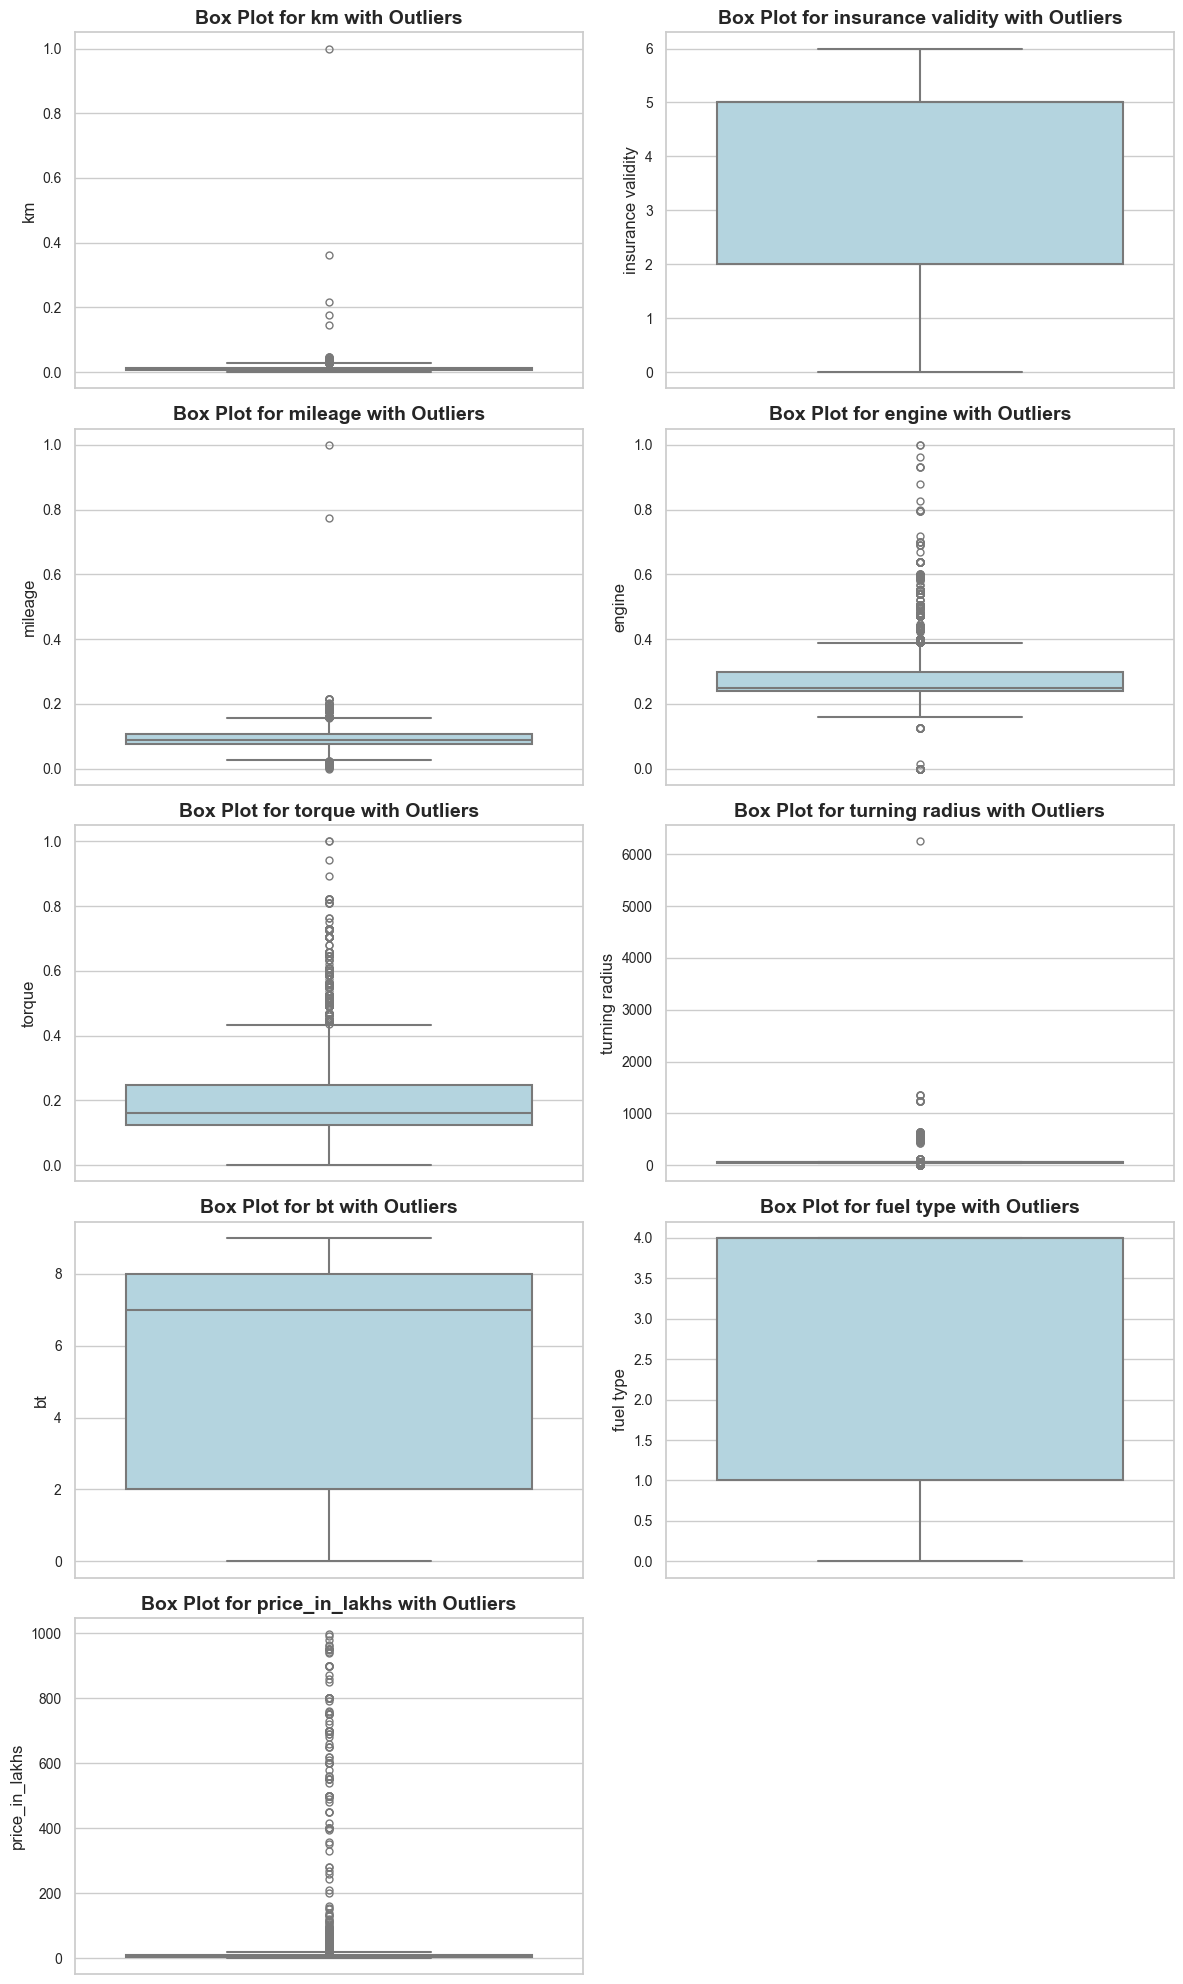

In [129]:
num_columns = len(col)
num_rows = (num_columns + 1) // 2
# Set a Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(12, num_rows * 4))

for i, column in enumerate(col, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(data=df, y=column, color="lightblue", fliersize=5, linewidth=1.5)
    plt.title(f'Box Plot for {column} with Outliers', fontsize=14, fontweight='bold')
    plt.ylabel(column, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

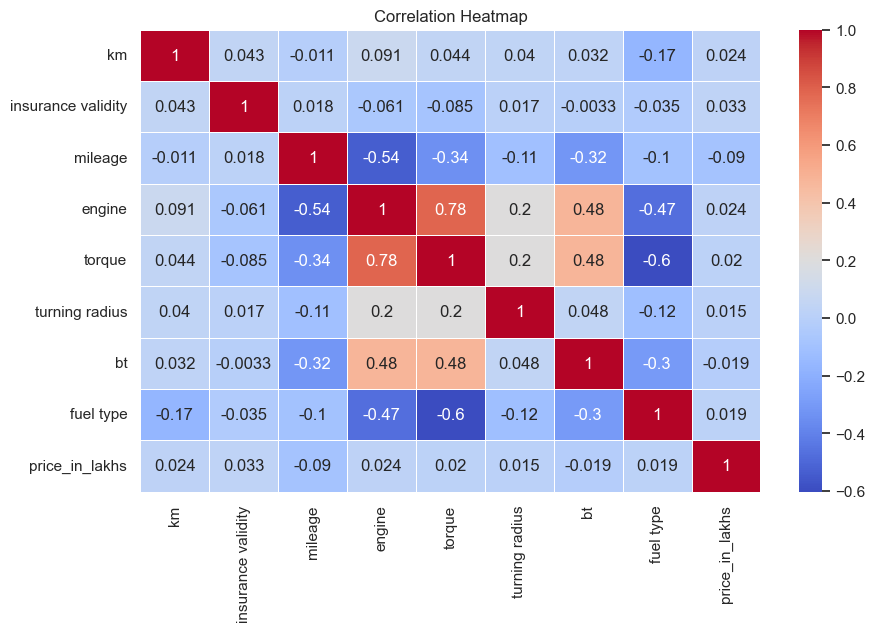

In [130]:
# Step 1: Select relevant columns for correlation
# We will focus on the specified columns: CustomerKey, ProductKey, StoreKey, and OrderNumber
correlation_data = df[col]

# Step 2: Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 3: Visualize the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

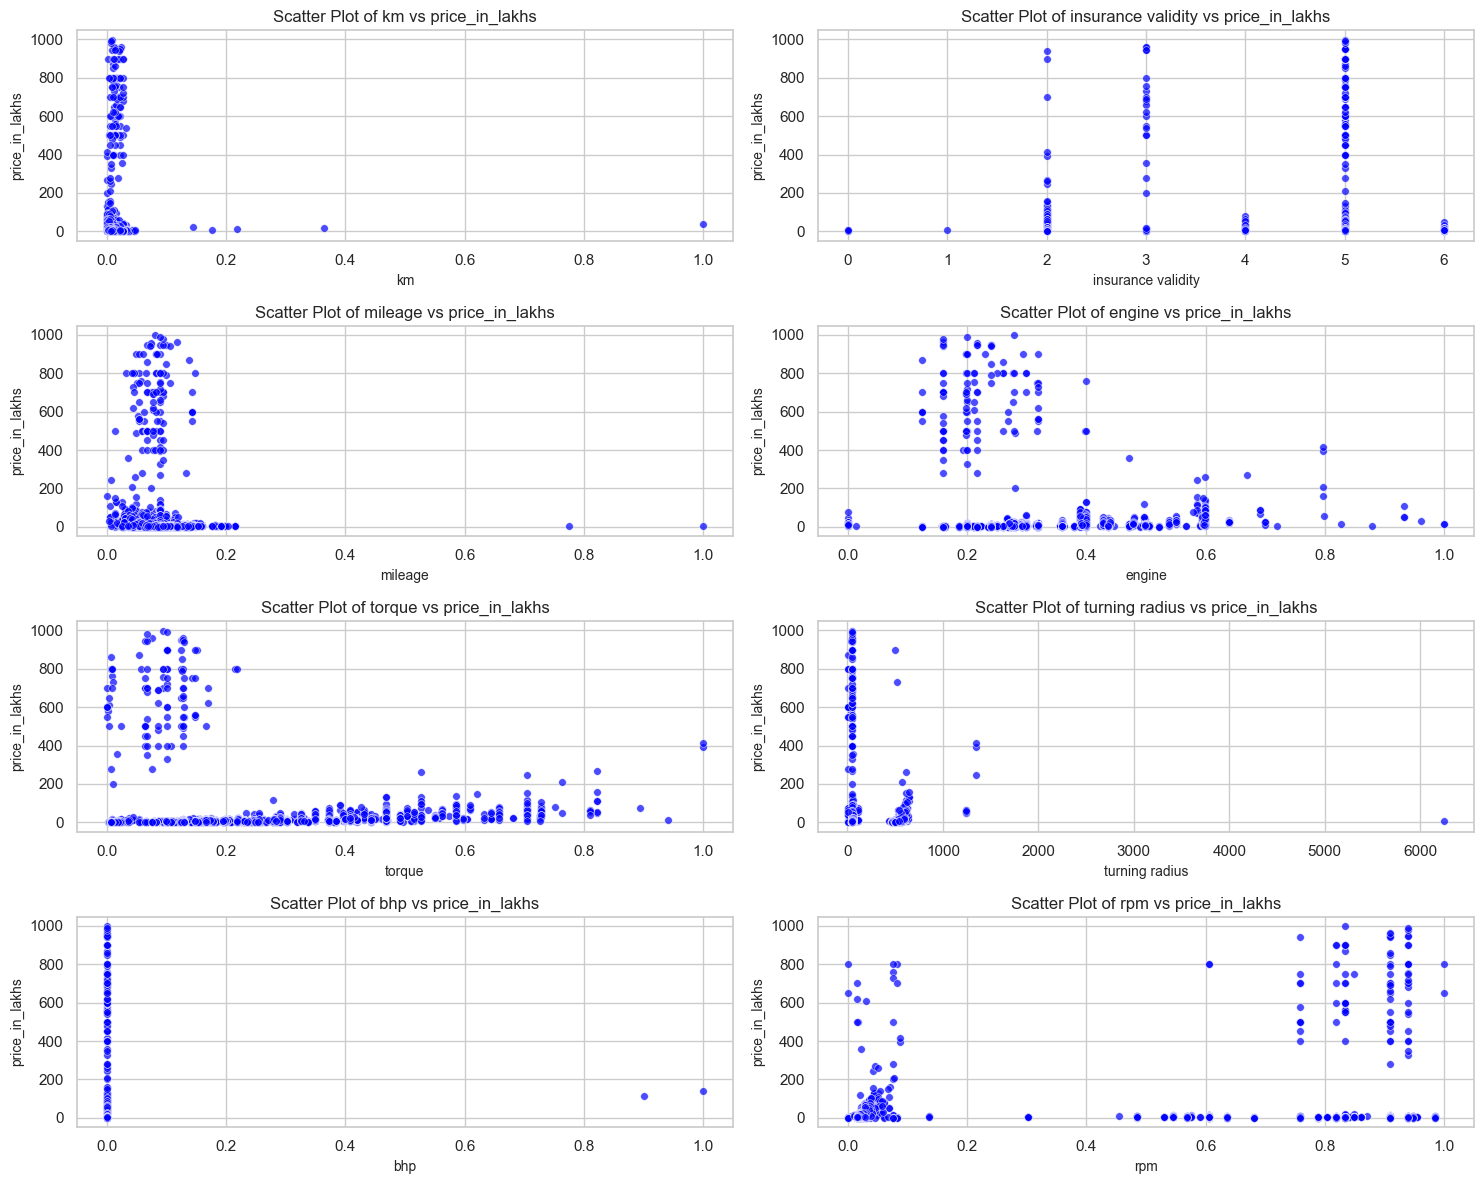

In [132]:
# Define the target variable and the columns you want to plot against it
target = "price_in_lakhs"  # Replace with your target column name
columns = ["km", "insurance validity", "mileage", "engine", "torque", "turning radius", "bhp", "rpm"]

# Create subplots for each column
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns, start=1):
    plt.subplot(4, 2, i)  # Create a 4x2 grid of subplots
    sns.scatterplot(data=df, x=column, y=target, color="blue", s=30, alpha=0.7)
    plt.title(f'Scatter Plot of {column} vs {target}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel(target, fontsize=10)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [133]:
df=filtered_df

In [135]:
df.corr()

,bt,km,ownerno,oem,model,insurance validity,fuel type,transmission,mileage,engine,...,turning radius,top speed,no door numbers,wheel size,alloy wheel size,city,bhp,rpm,reg_age,price_in_lakhs
bt,1.000000,0.078408,-0.005283,-0.072914,-0.062441,0.036695,-0.267322,-0.162621,-0.294402,0.476052,...,-0.003644,0.278595,-0.594441,0.257180,0.257180,0.021208,0.027145,-0.638385,-0.041105,0.423625
km,0.078408,1.000000,0.192003,0.014699,0.030416,0.074073,-0.306030,0.086595,-0.044828,0.244472,...,0.045705,0.057393,-0.087727,-0.097129,-0.097129,-0.032622,0.038611,-0.100864,0.405888,-0.166464
ownerno,-0.005283,0.192003,1.000000,-0.047213,-0.033311,0.117514,-0.075173,0.003959,-0.107362,0.138105,...,0.063713,0.020128,-0.075951,-0.123496,-0.123496,-0.072707,0.040490,-0.037159,0.378331,-0.201559
oem,-0.072914,0.014699,-0.047213,1.000000,0.988805,0.035139,-0.043493,0.018771,0.085251,-0.039759,...,0.105326,-0.097562,0.110740,0.040403,0.040403,-0.002316,-0.053516,0.028151,-0.110020,0.001632
model,-0.062441,0.030416,-0.033311,0.988805,1.000000,0.038520,-0.058424,0.017272,0.054524,-0.011430,...,0.130876,-0.074226,0.090743,0.024074,0.024074,-0.007694,-0.047794,0.007909,-0.082226,0.006603
insurance validity,0.036695,0.074073,0.117514,0.035139,0.038520,1.000000,-0.077779,0.049663,-0.018259,0.025557,...,0.050140,-0.007674,-0.029992,-0.060307,-0.060307,0.029401,0.023869,-0.036722,0.067102,-0.052303
fuel type,-0.267322,-0.306030,-0.075173,-0.043493,-0.058424,-0.077779,1.000000,-0.040238,-0.183194,-0.458517,...,-0.099809,-0.107452,0.028654,-0.150700,-0.150700,-0.035837,0.024869,0.334517,-0.132201,-0.199766
transmission,-0.162621,0.086595,0.003959,0.018771,0.017272,0.049663,-0.040238,1.000000,0.158072,-0.157825,...,-0.036421,-0.228568,0.088311,-0.198494,-0.198494,0.077319,0.020921,0.244280,0.115087,-0.380497
mileage,-0.294402,-0.044828,-0.107362,0.085251,0.054524,-0.018259,-0.183194,0.158072,1.000000,-0.492330,...,-0.071021,-0.221228,0.083357,-0.067796,-0.067796,0.013574,-0.048359,0.417033,-0.177193,-0.272111
engine,0.476052,0.244472,0.138105,-0.039759,-0.011430,0.025557,-0.458517,-0.157825,-0.492330,1.000000,...,0.116949,0.360893,-0.219210,0.294543,0.294543,-0.015851,0.032801,-0.620191,0.212104,0.441425


In [136]:
X = df.drop(columns=["price_in_lakhs"])
y = df["price_in_lakhs"]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5959, 29), (1490, 29), (5959,), (1490,))

In [138]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [139]:
fi = pd.DataFrame({"Features":X_train.columns, "Importance":rf.feature_importances_})

In [140]:
f_df = fi.sort_values(by="Importance", ascending=False)[0:17]
f_df

,Features,Importance
17,width,0.420092
28,reg_age,0.209125
16,length,0.083103
23,wheel size,0.054933
24,alloy wheel size,0.040637
27,rpm,0.029817
1,km,0.026004
25,city,0.022641
10,torque,0.017375
21,top speed,0.014413


In [141]:
X = df[f_df["Features"]]

In [142]:
X.to_csv("X.csv")

In [143]:
y

0       4.00
1       8.11
2       5.85
3       4.62
4       7.90
        ... 
8364    5.10
8365    1.80
8366    5.50
8367    1.40
8368    5.00
Name: price_in_lakhs, Length: 7449, dtype: float64

In [144]:
y.to_csv("y.csv")

In [145]:
feature_names = X.columns
feature_names

Index(['width', 'reg_age', 'length', 'wheel size', 'alloy wheel size', 'rpm',
       'km', 'city', 'torque', 'top speed', 'mileage', 'height', 'model',
       'engine and transmission', 'transmission', 'engine', 'displacement'],
      dtype='object')

In [146]:
X = pd.read_csv("X.csv").drop(columns=["Unnamed: 0"])

In [147]:
y = pd.read_csv("y.csv").drop(columns=["Unnamed: 0"])
y = y["price_in_lakhs"]

In [148]:
feature_names = X.columns
feature_names

Index(['width', 'reg_age', 'length', 'wheel size', 'alloy wheel size', 'rpm',
       'km', 'city', 'torque', 'top speed', 'mileage', 'height', 'model',
       'engine and transmission', 'transmission', 'engine', 'displacement'],
      dtype='object')

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5959, 17), (1490, 17), (5959,), (1490,))

In [150]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [151]:
rf_pred = rf.predict(X_test)
rf_pred

array([7.873 , 5.2633, 6.534 , ..., 4.1787, 4.42  , 5.7251])

In [154]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.1/124.9 MB 573.4 kB/s eta 0:03:38
   ---------------------------------------- 0.2/124.9 MB 833.5 kB/s eta 0:02:30
   ---------------------------------------- 0.3/124.9 MB 1.2 MB/s eta 0:01:47
   ---------------------------------------- 0.6/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 1.1/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.4/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 1.8/124.9 MB 4.3 MB/s eta 0:00:29
    --------------------------------------- 2.3/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 2.6/124.9 MB 5.2 MB/s eta 0:00:24
    --------------------------------------- 3.1/124.9 MB 5.4 MB/s eta 0:

In [155]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as XGB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [156]:
r2_score(y_test,rf_pred)

0.9019435243846904

In [157]:
#mape

100-((abs(y_test-rf_pred)/y_test)*100).mean()

86.54138220937539

In [158]:
#mse
np.sqrt(mean_squared_error(y_test,rf_pred))

1.1615548977924548

In [159]:
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.035 seconds


In [160]:
importances

array([0.42194389, 0.2105963 , 0.08439237, 0.04724642, 0.05077589,
       0.03028072, 0.02916609, 0.02443218, 0.0171772 , 0.01541981,
       0.01499574, 0.01188803, 0.0168311 , 0.0069135 , 0.00645459,
       0.0060349 , 0.00545125])

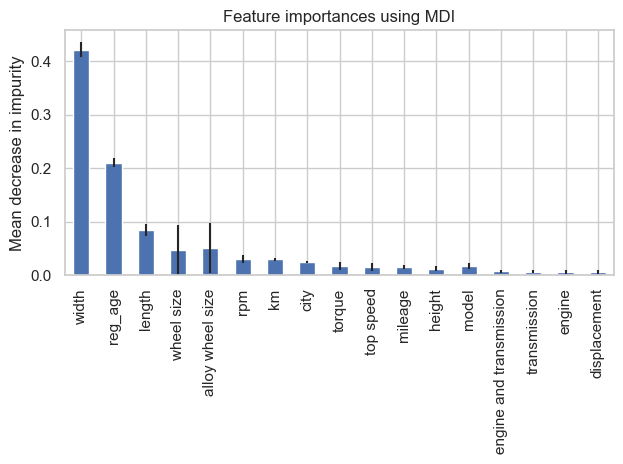

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [162]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([6.9073563 , 7.14165538, 6.86129821, ..., 3.37634314, 4.72685811,
       8.50268263])

In [163]:
r2_score(y_test,lr_pred)

0.7598981979879453

In [164]:
#mape( Mean Absolute Percentage Error)

100-((abs(y_test-lr_pred)/y_test)*100).mean()

72.12802422204916

In [165]:
#mse(Mean Square error)
np.sqrt(mean_squared_error(y_test,lr_pred))

1.8176041698030234

In [166]:
dtr = DecisionTreeRegressor()
# regr_2 = DecisionTreeRegressor(max_depth=10)

dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_pred

array([ 8.21, 17.  ,  6.6 , ...,  4.75,  6.  ,  4.  ])

In [167]:
r2_score(y_test,dtr_pred)

0.8079910666792885

In [168]:
#mape( Mean Absolute Percentage Error)

100-((abs(y_test-dtr_pred)/y_test)*100).mean()

81.96031043302176

In [169]:
#mse(Mean Square error)
np.sqrt(mean_squared_error(y_test,dtr_pred))

1.62540771974493

In [170]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
gb_pred

array([7.73036327, 5.61820341, 6.55581756, ..., 3.92482886, 4.02752247,
       7.30993025])

In [171]:
r2_score(y_test,gb_pred)

0.8981042896499509

In [172]:
#mape( Mean Absolute Percentage Error)

100-((abs(y_test-gb_pred)/y_test)*100).mean()

85.2581089966647

In [173]:
#mse(Mean Square error)
np.sqrt(mean_squared_error(y_test,gb_pred))

1.1840759256270192

In [174]:
xgb = XGB.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [175]:
xgb_pred = xgb.predict(X_test)

In [176]:
r2_score(y_test,xgb_pred)

0.8958659230365571

In [177]:
#mape( Mean Absolute Percentage Error)

100-((abs(y_test-xgb_pred)/y_test)*100).mean()

85.15937398599894

In [178]:
#mse(Mean Square error)
np.sqrt(mean_squared_error(y_test,xgb_pred))

1.1970107108845658

In [179]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.77262741, 0.75775987, 0.77639634, 0.74607448, 0.75814597])

In [180]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   


# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [181]:
lr_cv_pred = model_cv.predict(X_test)
lr_cv_pred

array([7.1205334 , 7.2071324 , 6.90797321, ..., 2.91838553, 4.95181487,
       8.68921145])

In [182]:
r2_score(y_test,lr_cv_pred)

0.750782831705372

In [183]:
#mape( Mean Absolute Percentage Error)

100-((abs(y_test-lr_cv_pred)/y_test)*100).mean()

72.0221022766242